# PPP Loan Analysis With Respect to Gender, Race, and Ethnicity
Anton De Franco
---
CMPS-3160 Final Tutorial Milestone 1
---
Please visit my [GitHub webpage!](https://antondefranco.github.io/)

# Introduction
During the Covid-19 pandemic, the U.S. Government under the CARES act gave small businesses the opportunity to apply and receive forgivable PPP loans. The data for who recieved a PPP loan, and for how much, is publicly available online at [this](https://data.sba.gov/dataset/ppp-foia) website. I would consider this data to be extremely reliable and overall very accurate, as it comes directly from the government. The overall PPP loan information is split into several subsets of data, with one file consisting of loans data over 150k USD and 12 other files consisting of all other loans under 150k USD. There are many variables in this dataset, and a comprehensive list of all variables is found in [this](https://docs.google.com/document/d/1BhUekJLlZq3nVSa81ubLQsIsNJUlCV9sake9vDpw9pM/edit) data dictionary.
Even though there are 12 datasets consisting of loan data under 150k, I do not see a obvious way that they were segmented.


I would like to work with this data primarily because of it's relevancy. The Covid-19 pandemic and general shutdown of the U.S. happend extremely recently, and the PPP loans were the result of a hasty government response to help struggling businesses during the pandemic. The amount of data pertaining to the PPP loans is quite extensive, and I feel as if there are important questions to be answered be poking and proding this data.

## Project Goals

I will be investigating how several variables such as Gender, Veteran Status, and Ethnicity are correlated with the PPP loan amount and how much of the loan will be forgiven. This PPP data is publicly available at [this](https://data.sba.gov/dataset/ppp-foia) government website. By analyzing this data, I would like to see the answers to questions such as:


1.   Did one specific ethnicity or race borrow more money compared to others?
2.   Are the reported races of borrowers representative of the population in the U.S.?
3.   Did people who identify as a veteran borrow more or less on average than those who did not identify as veteran?

---

To take this project a step further, I will also examine if borrowing a PPP loan was nescessary in the first place for publicly traded companies. I will get the data needed for this project from [Yahoo! Finances](https://finance.yahoo.com/).




## Collaboration Plan
I plan to set aside time each Wednesday from 6-9pm to work on this project, with additional work as nescessary on the weekends. Since I have the benefit of not needing to coordinate with another person, the majority of my work will be done by myself in google colab.

# Extraction, Transform, and Load (ETL)

## Loading the datasets

Since there are really two versions of the PPP data, over 150k and under 150k, I will load up an example of both datasets. First, I need to link my drive where the files are stored to Google CoLab.

In [ ]:
#Link google drive, where the data is stored, to Google CoLab
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Capstone CMPS/PPP_Data


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Capstone CMPS/PPP_Data


I will begin by importing two libraries. I will then load the dataset containing loan data over 150k and display the first few rows.

In [ ]:
#import libraries used for this project
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None) #see all columns of dataset for readability

#load dataset for over 150k and display

df_over = pd.read_csv("public_150k_plus_220930.csv")
df_over.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,Paid in Full,24,100,769358.78,769358.78,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,Sumter,SUMTER,SC,29150-9662,SC-05,62.0,325510.0,Unanswered,Unknown/NotStated,NaN,769358.78,NaN,NaN,NaN,NaN,NaN,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,Paid in Full,24,100,736927.79,736927.79,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,Y,Y,Existing or more than 2 years old,North Charleston,CHARLESTON,SC,29420-9000,SC-06,73.0,561730.0,White,Unknown/NotStated,NaN,736927.79,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,Paid in Full,24,100,691355.00,691355.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SEATTLE,KING,WA,98112-2922,WA-07,75.0,NaN,Unanswered,Unknown/NotStated,NaN,691355.00,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,Paid in Full,24,100,499871.00,499871.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-08,21.0,236115.0,American Indian or Alaska Native,Not Hispanic or Latino,NaN,499871.00,NaN,NaN,NaN,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,Paid in Full,24,100,367437.00,367437.00,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,25.0,484210.0,Unanswered,Unknown/NotStated,NaN,367437.00,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021


Next, I will do the same for the dataset of loans under 150k.

In [ ]:
#load dataset for under 150k and display
df_under = pd.read_csv("public_up_to_150k_12_220930.csv")
df_under.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,4559397800,05/28/2020,353,PPP,"ARLINGTON CONSULTANTS GROUP, LLC",4601 FAIRFAX DR STE 1200,ARLINGTON,VA,22203-1500,07/17/2021,Paid in Full,24,100,85000.0,85000.0,0.0,NaN,73259,United Bank,11185 Fairfax Blvd,FAIRFAX,VA,22030-5049,U,N,N,Existing or more than 2 years old,ARLINGTON,ARLINGTON,VA,22203-1500,VA-08,5.0,541618.0,Unanswered,Unknown/NotStated,NaN,85000.0,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),73259,United Bank,FAIRFAX,VA,Unanswered,Unanswered,NaN,85885.42,06/24/2021
1,4784467107,04/13/2020,304,PPP,"ELEVATING EQUIPMENT INSPECTION SERVICE, LLC",208 w depot street,BEDFORD,VA,24523-1936,04/16/2021,Paid in Full,24,100,85000.0,85000.0,0.0,NaN,73215,American National Bank and Trust Company,628 Main St,DANVILLE,VA,24541-1320,R,Y,N,Existing or more than 2 years old,BEDFORD,BEDFORD,VA,24523-1936,VA-05,11.0,238290.0,Unanswered,Unknown/NotStated,NaN,85000.0,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),73215,American National Bank and Trust Company,DANVILLE,VA,Unanswered,Unanswered,NaN,85774.44,03/16/2021
2,4939997010,04/04/2020,353,PPP,SIERRA CORP.,6723 Whittier Avenue Suite 204,MC LEAN,VA,22101-4509,01/09/2021,Paid in Full,24,100,85000.0,85000.0,0.0,NaN,122517,Atlantic Union Bank,"1051 E Cary St, Ste 103",RICHMOND,VA,23219-4029,U,N,N,Existing or more than 2 years old,MC LEAN,FAIRFAX,VA,22101-4509,VA-08,4.0,541513.0,Unanswered,Unknown/NotStated,NaN,85000.0,NaN,NaN,NaN,NaN,NaN,Corporation,122517,Atlantic Union Bank,RICHMOND,VA,Unanswered,Unanswered,NaN,81567.00,12/15/2020
3,5055638002,06/26/2020,353,PPP,BROWNE AND ASSOCIATES LLC,1203 Bishopsgate Way,Reston,VA,20194-1407,10/28/2021,Paid in Full,60,100,85000.0,85000.0,0.0,NaN,123499,BayFirst National Bank,700 Central Avenue,Saint Petersburg,FL,33701,U,N,N,Unanswered,Reston,FAIRFAX,VA,20194-1407,VA-11,6.0,531210.0,Unanswered,Unknown/NotStated,NaN,85000.0,NaN,0.0,NaN,NaN,NaN,Limited Liability Company(LLC),188567,Loan Source Incorporated,NEW YORK,NY,Unanswered,Unanswered,NaN,85908.22,08/03/2021
4,5145117704,05/01/2020,353,PPP,BUILT BY BEAVERS LLC,5628 MOUNT BURNSIDE WAY,BURKE,VA,22015-2143,09/25/2021,Paid in Full,24,100,85000.0,85000.0,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,BURKE,FAIRFAX,VA,22015-2143,VA-11,6.0,561990.0,White,Unknown/NotStated,NaN,85000.0,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,86054.93,07/29/2021


The data is overall very clean, and follows the principles of tidy data. This means that at this current stage, there is no other transforming or tidying that I need to do in order to start working on the data.

## Checking the data types
I would like to verify that all of the variables types are correct. Since the both the over 150k and under 150k datasets share the same variables, I only need to check the data types for one.

In [ ]:
df_under.dtypes

LoanNumber                       int64
DateApproved                    object
SBAOfficeCode                    int64
ProcessingMethod                object
BorrowerName                    object
BorrowerAddress                 object
BorrowerCity                    object
BorrowerState                   object
BorrowerZip                     object
LoanStatusDate                  object
LoanStatus                      object
Term                             int64
SBAGuarantyPercentage            int64
InitialApprovalAmount          float64
CurrentApprovalAmount          float64
UndisbursedAmount              float64
FranchiseName                   object
ServicingLenderLocationID        int64
ServicingLenderName             object
ServicingLenderAddress          object
ServicingLenderCity             object
ServicingLenderState            object
ServicingLenderZip              object
RuralUrbanIndicator             object
HubzoneIndicator                object
LMIIndicator             

All of the variables appear to be corresponding to the correct type of data, so there's no need to manually go and change the variable types.

#Exploratory Data Analysis (EDA)

I would like to start by asking a basic question: *What was the average amount borrowed per gender for both the under 150k and over 150k datasets?* I will start by looking at the over 150k dataset then move on to under 150k .

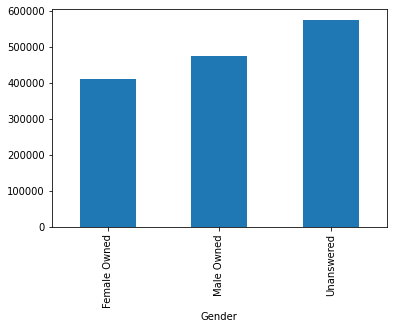

In [ ]:
#group by the gender and loan amount of take the mean
df_over.groupby('Gender')['CurrentApprovalAmount'].mean().plot.bar()

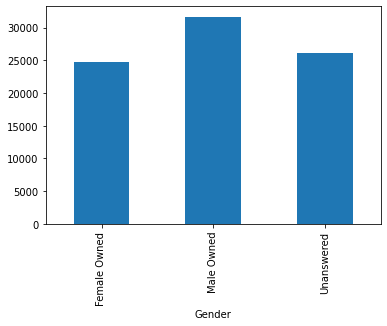

In [ ]:
#Repeat same steps for under 150k
df_under.groupby('Gender')['CurrentApprovalAmount'].mean().plot.bar()

We can see that in both graphs, male owned businsess tended to borrow more on average compared to female owned businesses. It is not immediately obvious as to why this would be the case. It could be that male business owners teneded to be more aggressive in the amount of money that they borrowed. However, it might also be true that the overall lending process was biased towards men, and therefore women recieved a lower loan amount of average. This is a difficult question to answer, and it would need further analysis.


## Correlation between Loan Amount and Number of Employees Reported
I have another question I would like to ask: *Is the loan amount correlated with the number of reported employees?* I would expect there to be some correlation because the more employees a business has the more expenses they have in the form of wages. Both the loan amount and the jobs reported are both numeric varibles and do not require any pre-processing if we want to see how strongly they correlate with each other. I will start checking the correlation between these two columns for both over 150k and under 150k loan amounts.

In [ ]:
#check correlation for over 150k
col_over_1 = df_over['CurrentApprovalAmount']
col_over_2 = df_over['JobsReported']

cor_over = col_over_1.corr(col_over_2)
cor_over

0.7538269735921438

In [ ]:
#check correlation for under 150k
col_under_1 = df_under['CurrentApprovalAmount']
col_under_2 = df_under['JobsReported']

cor_under = col_under_1.corr(col_under_2)
cor_under

0.4556038762493896

I see that there is a moderate correlation between the loan amount and the number of employees at the firm when the loan amount is over 150k. This makes sense and follows my prediction. Surprisingly, the correlation between these two variables for the under 150k dataset was weak. I would like to see both these correlations visually so I can get a better picture.

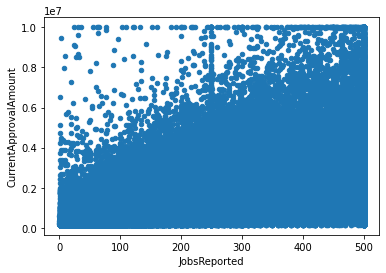

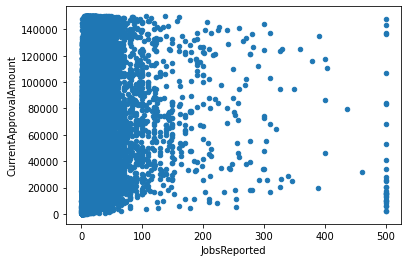

In [ ]:
df_over.plot.scatter(x='JobsReported',y='CurrentApprovalAmount')
df_under.plot.scatter(x='JobsReported',y='CurrentApprovalAmount')

The data in the over 150k dataset looks as I would expect it to knowing the correlation between the two variables. Likewse, the under 150k dataset is visibly weakly correlated. However, looking at the under 150k dataset shows me something interesting: there are many companies with very few employees who applied for loans over 140k. It could be that these companies had justificaitons for requesting that much money, or it could be indicative that these companies applied for more money than they actually needed. After all, a common issue with the PPP loans was that the money always seemed to end up being used for the sole benefit of the owner.

#Future Plans
Going into the future, I would like to explore both anomalies I found further. I would especially like to know why so many companies with few employees were borrowing so much money. I thought that the weak correlation in the under 150k dataset was especially interesting. I would also like to look more closely at how the self-reported race of borrowers affects the loan amount.

In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/Colab_Notebooks/Data_Science_Milestone_1.ipynb

SyntaxError: ignored